**SCRAPPING**

Dans cette première étape, nous allons effectuer du scrapping sur le site hellowork

Celui-ci référence les emplois, le salaires, les zones sur une seule et même page.

Il n'est pas nécéssaire de changer de page pour afficher plus d'offres, la pagination se fait automatiquement. Le maximum de page est géré par la variable maximum_pages.

**Ce code a donc pour but de :**
- Se rendre sur le site hellowork.com, section Data scientist en France
- Collecter les données et les ranger dans un tableau via pandas (Nom des posts, nom de l'entreprise, type de post, zones, salaires, mois en cours, années en cours)
- Passer à la page suivante dès que le scrapping est fait
- Organiser les emplois par type (colonne Number) selon les mots clés : 
    - 1 Data analyst 
    - 2 Data scientist
    - 3 Data engineer
    - 4 Big data
    - 5 Business Intelligence
    - 6 Chef(fe) de projet
    - 7 Developpeur
    - 0 Autres post dans la data
- Créer un fichier Excel avec les données collectées afin de les stocker
- Etablire un model de régression linéaire afin d'évaluer l'évolution des salaire par type ainsi que l'évolution du nombre de post à pourvoir puis afficher graphiquement

Vous pouvez run all directement

--------------------------------------

**Nous commençons par importer les packages**

In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install selenium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
%pip install webdriver-manager

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
%pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
%pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/f6/28/b569523552a11b49dc4d33952f43dedb23792fe8ce2f2151d070d615861a/scikit_learn-1.4.0-1-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
    --------------------------------------- 0.2/10.6 MB 5.3 MB/s eta 0:00:02
   -- ------------------------------------- 0.6/10.6 MB 7.9 MB/s eta 0:00:02
   ---- ----------------------------------- 1.2/10.6 MB 9.4 MB/s eta 0:00:01
   ------ --------------------------------- 1.7/10.6 MB 1


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


**Nous scrappons le site internet**

Pour rappel, maximum_pages défini le nombre de pages ciblées.

------------------------------------------

**SCRAPPING**

Nous scrappons le site afin de créer un fichier excel qui permettra de sauvegarder les données

In [7]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import time
import re
from datetime import datetime

def extract_salary(salary_str):
    numbers = re.findall(r'\d+', salary_str)
    return ''.join(numbers) if numbers else None

def process_salary(salary_str):
    if salary_str and '-' in salary_str:
        salary_min, salary_max = salary_str.split('-')
        return int(extract_salary(salary_min)), int(extract_salary(salary_max))
    else:
        return None, None

def classify_job_title(job_title):
    job_title_lower = job_title.lower()
    if "analyste" in job_title_lower or "analyst" in job_title_lower:
        return 1
    elif "scientist" in job_title_lower:
        return 2
    elif "engineer" in job_title_lower or "ingénieur" in job_title_lower or "ingenieur" in job_title_lower:
        return 3
    elif "big" in job_title_lower:
        return 4
    elif "bi" in job_title_lower:
        return 5
    elif "projet" in job_title_lower:
        return 6
    elif "developpeur" in job_title_lower or "developer" in job_title_lower:
        return 7
    else:
        return 0

options = webdriver.ChromeOptions()
options.add_argument("--disable-notifications")
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

current_page = 1
maximum_pages = 101
data = []

current_day = datetime.now().day
current_month = datetime.now().month
current_year = datetime.now().year

while current_page <= maximum_pages:
    url = f'https://www.hellowork.com/fr-fr/emploi/recherche.html?k=data+&ray=all&msa=0&cod=all&d=all&p={current_page}&mode=pagination'
    driver.get(url)
    time.sleep(3)

    job_listings = driver.find_elements(By.CSS_SELECTOR, 'li[class="!tw-mb-6 "]')
    
    for job in job_listings:
        job_title_elements = job.find_elements(By.CSS_SELECTOR, 'a[class="md:tw-text-xlOld tw-text-2xlOld tw-leading-[1.625rem]"]')
        contract_elements = job.find_elements(By.CSS_SELECTOR, 'span[data-cy="contract"]')
        company_elements = job.find_elements(By.CSS_SELECTOR, 'span.tw-mr-2')
        location_elements = job.find_elements(By.CSS_SELECTOR, 'span.tw-text-ellipsis')
        salary_elements = job.find_elements(By.CSS_SELECTOR, 'span.tw-text-jobsCandidacy.tw-typo-s')

        job_title = job_title_elements[0].text if job_title_elements else 'N/A'
        number = classify_job_title(job_title)
        contract = contract_elements[0].text if contract_elements else 'N/A'
        company = company_elements[0].text if company_elements else 'N/A'

        # Traitement de la localisation et extraction de la région
        location_raw = location_elements[0].text if location_elements else 'N/A'
        location_parts = re.split(r'(\d+)', location_raw)
        location_clean = location_parts[0].strip()
        region = location_parts[1].strip() if len(location_parts) > 1 else 'N/A'

        salary = salary_elements[0].text if salary_elements else None
        salary_min, salary_max = process_salary(salary)
        
        data.append([number, job_title, contract, company, location_clean, region, salary_min, salary_max, current_day, current_month, current_year])

    current_page += 1

driver.quit()

df = pd.DataFrame(data, columns=["Number", "Job Title", "Contrat", "Company", "Location", "Region", "Salary min", "Salary max", "Day", "Month", "Year"])

df['Salary min'] = pd.to_numeric(df['Salary min'], errors='coerce')
df['Salary max'] = pd.to_numeric(df['Salary max'], errors='coerce')
df['Salary'] = df[['Salary min', 'Salary max']].mean(axis=1, skipna=True)
df = df.dropna(subset=['Salary'])


df.to_excel('JobsListML.xlsx', index=False)    




**Nous analysons les données collectées**

In [8]:
df

,Number,Job Title,Contrat,Company,Location,Region,Salary min,Salary max,Day,Month,Year,Salary
0,0,Data Administrator H/F,CDI,Adsearch,Aulnay-sous-Bois -,93,30000.0,50000.0,22,1,2024,40000.0
1,0,Data Architecte H/F,CDI,Adsearch,Mougins -,06,50000.0,60000.0,22,1,2024,55000.0
2,0,Data Enginer H/F,CDI,HR Team,Nice -,06,37000.0,48000.0,22,1,2024,42500.0
3,0,Qa Data H/F,CDI,Altelios Technology Group,Puteaux -,92,45000.0,60000.0,22,1,2024,52500.0
4,0,Lead Dev Data H/F,CDI - Temps partiel,Bouygues Telecom,Meudon -,92,60000.0,70000.0,22,1,2024,65000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
486,0,Responsable Data Patrimoine H/F,CDI,HLM,Saint-Nazaire -,44,30000.0,35000.0,22,1,2024,32500.0
487,1,Alternance Data Analyste H/F,Alternance,Eurocom Business Services,Clichy -,92,47174.0,174720.0,22,1,2024,110947.0
488,1,Data Analyste en Alternance H/F,Alternance,Lasecurecrute.fr,Montauban -,82,47174.0,174720.0,22,1,2024,110947.0
489,1,Gdo - Alternance - Business Intelligence Data ...,Alternance,Air Liquide,Paris -,75,47174.0,174720.0,22,1,2024,110947.0


In [10]:
df.describe()

,Number,Salary min,Salary max,Day,Month,Year,Salary
count,457.000000,4.570000e+02,4.570000e+02,457.0,457.0,457.0,4.570000e+02
mean,1.824945,4.941921e+04,1.292847e+05,22.0,1.0,2024.0,8.935195e+04
std,1.868480,1.951825e+05,6.265997e+05,0.0,0.0,0.0,3.279629e+05
min,0.000000,1.400000e+01,1.600000e+01,22.0,1.0,2024.0,1.500000e+01
25%,0.000000,3.500000e+04,4.500000e+04,22.0,1.0,2024.0,4.000000e+04
50%,1.000000,4.000000e+04,5.200000e+04,22.0,1.0,2024.0,4.750000e+04
75%,3.000000,5.000000e+04,6.000000e+04,22.0,1.0,2024.0,5.750000e+04
max,7.000000,4.200003e+06,6.999998e+06,22.0,1.0,2024.0,3.527499e+06


In [12]:
# Nous calculons la moyenne des salaires par type.
# Le post de data engineer semble être le plus rémunéré en moyenne

average_salaries = df.groupby('Number')['Salary'].mean()
average_salaries

Number
0    108904.613497
1     49071.591463
2     48145.314286
3    125771.204545
4     60967.868421
5     50483.923077
6     49453.529412
7     42500.000000
Name: Salary, dtype: float64

In [13]:
# Nous calculons le nombre de post à pourvoir par type
# Sous constatons que les post de data engineer et data analyst sont les plus demandés

count_salaries = df.groupby('Number')['Salary'].count()
count_salaries

Number
0    163
1     82
2     35
3    110
4     19
5     13
6     34
7      1
Name: Salary, dtype: int64

-------------------

**Projection**

Nous souhaitons faire une projection des salaires futurs et évaluer le nombre d'annonce en ligne par catégorie. Cependant, n'ayant que les données du 15/01, en attendant les prochaines et afin de tester la régression, nous établissons des données aléatoires sur la bases de celles scrappées. En mutlipliant par 0.5 à 1.5.

In [48]:
import random

# Nous générons des nombres aléatoires entre 0.9 et 1.1

random_number0 = random.uniform(0.9, 1.1)
random_number1 = random.uniform(0.9, 1.1)
random_number2 = random.uniform(0.9, 1.1)
random_number3 = random.uniform(0.9, 1.1)
random_number4 = random.uniform(0.9, 1.1)
random_number5 = random.uniform(0.9, 1.1)
random_number6 = random.uniform(0.9, 1.1)
random_number7 = random.uniform(0.9, 1.1)


**Regression linéaire**

Nous allons maintenant effectuer la regression et afficher graphiquement les resultats

Régression pour Mean_Salary_0:
  rmse : 4813451.115613876
  r2 : 0.3620463862333254
  Coefficient (pente): -8.361637884999885
  Intercept: 6281231.675819255



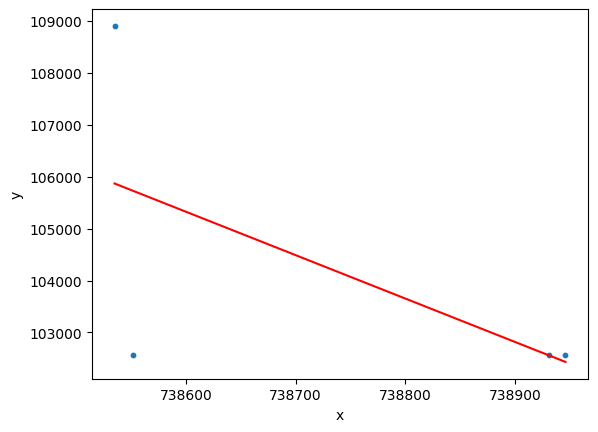

Régression pour Mean_Salary_1:
  rmse : 367265.8683850098
  r2 : 0.36204638623347196
  Coefficient (pente): -2.309688210976888
  Intercept: 1754018.7855668429



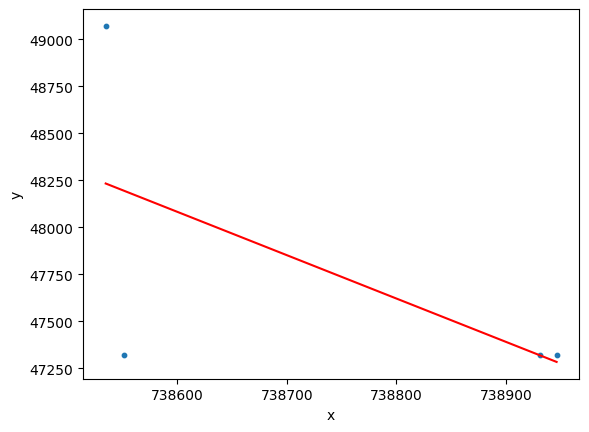

Régression pour Mean_Salary_2:
  rmse : 1172909.6024729852
  r2 : 0.8775052572713072
  Coefficient (pente): 14.66472505588137
  Intercept: -10783759.313219296



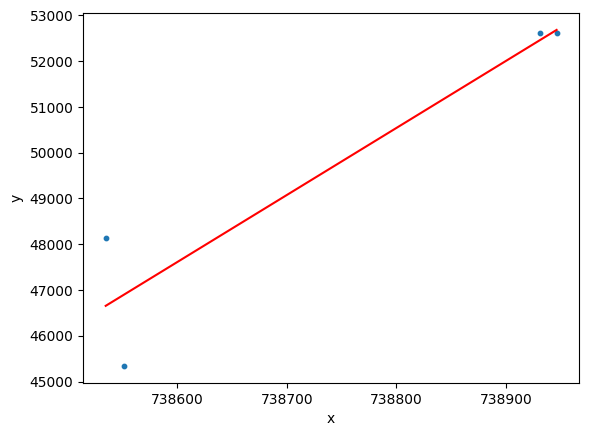

Régression pour Mean_Salary_3:
  rmse : 685900387.3720231
  r2 : 0.3620463862334202
  Coefficient (pente): -99.81449113699765
  Intercept: 73806034.9674662



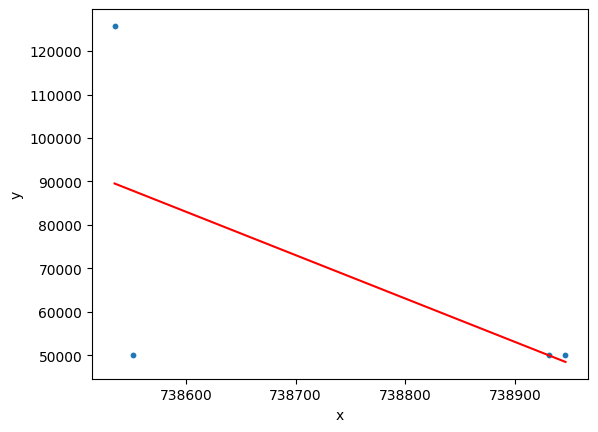

Régression pour Mean_Salary_4:
  rmse : 265679.7735777079
  r2 : 0.3620463862332647
  Coefficient (pente): 1.9644560601729733
  Intercept: -1389138.6142694375



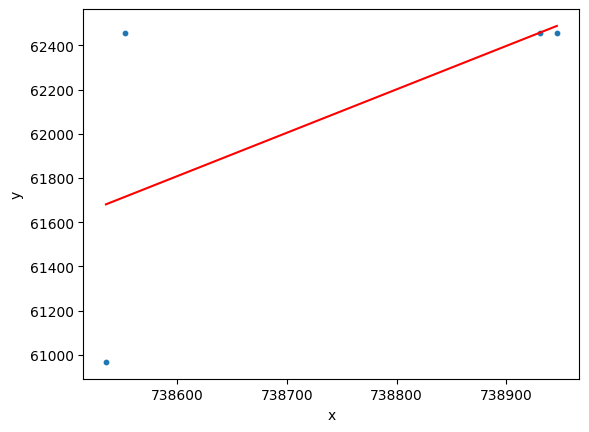

Régression pour Mean_Salary_5:
  rmse : 2894644.274229016
  r2 : 0.3620463862335045
  Coefficient (pente): -6.4842637733343755
  Intercept: 4836985.959859227



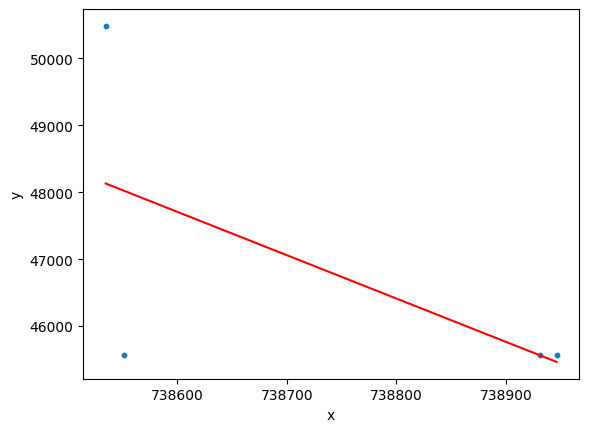

Régression pour Mean_Salary_6:
  rmse : 140816.75363304006
  r2 : 0.36204638623347307
  Coefficient (pente): 1.430178473578682
  Intercept: -1006264.192143293



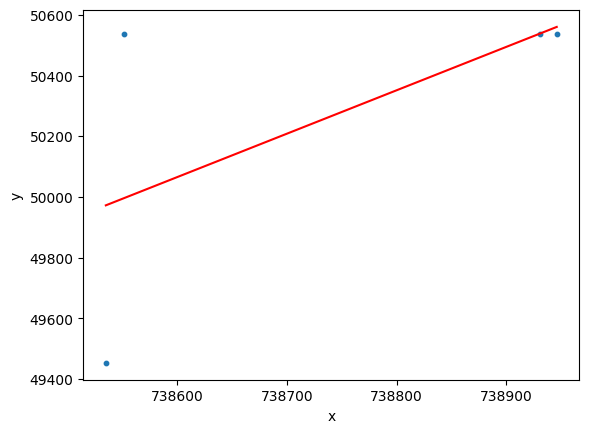

Régression pour Mean_Salary_7:
  rmse : 707820.2476924052
  r2 : 0.36204638623326046
  Coefficient (pente): -3.2064506774407713
  Intercept: 2409412.1483810456



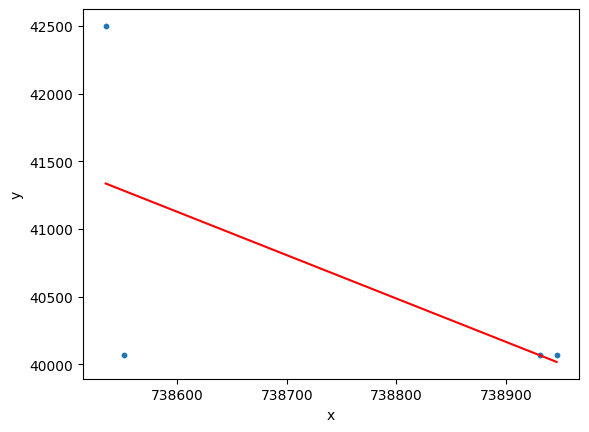

In [52]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Nous établissons la bibliothèque data comprenant chaque type d'emploi, les données du 15/01 sont celles scrappées, les suivantes sont établies aléatoirement pour tester la régression
data_average = {
    'Date': ['01/15/2023', '02/01/2023', '02/15/2024', '03/01/2024',],
    'Mean_Salary_0': [average_salaries[0], average_salaries[0]*random_number0, average_salaries[0]*random_number0, average_salaries[0]*random_number0],  # Pour Number 1
    'Mean_Salary_1': [average_salaries[1], average_salaries[1]*random_number1, average_salaries[1]*random_number1, average_salaries[1]*random_number1],  # Pour Number 2
    'Mean_Salary_2': [average_salaries[2], average_salaries[2]*random_number0, average_salaries[2]*random_number2, average_salaries[2]*random_number2],  # Pour Number 2
    'Mean_Salary_3': [average_salaries[3], average_salaries[2]*random_number3, average_salaries[2]*random_number3, average_salaries[2]*random_number3],  # Pour Number 2
    'Mean_Salary_4': [average_salaries[4], average_salaries[4]*random_number4, average_salaries[4]*random_number4, average_salaries[4]*random_number4],  # Pour Number 2
    'Mean_Salary_5': [average_salaries[5], average_salaries[5]*random_number5, average_salaries[5]*random_number5, average_salaries[5]*random_number5],  # Pour Number 2
    'Mean_Salary_6': [average_salaries[6], average_salaries[6]*random_number6, average_salaries[6]*random_number6, average_salaries[6]*random_number6],  # Pour Number 2
    'Mean_Salary_7': [average_salaries[7], average_salaries[7]*random_number7, average_salaries[7]*random_number7, average_salaries[7]*random_number7],  # Pour Number 2
    
}

# Création du data frame
df_average = pd.DataFrame(data)

# Transformation des dates en nombres et non en string
df_average['Date'] = pd.to_datetime(df_average['Date'])
df_average['Date_ordinal'] = df_average['Date'].apply(lambda x: x.toordinal())

# Nous faisons la regression linéaire pour chaque groupe de Number en excluant la colonne 'Date' et 'Date_ordinal'
for col in df_average.columns[1:-1]:  
    X_average = df_average[['Date_ordinal']]
    y_average = df_average[col]
    model_average = LinearRegression()
    model_average.fit(X_average, y_average)
    y_predicted = model_average.predict(X_average)

    # Évaluation du modèle
    rmse = mean_squared_error(y_average, y_predicted)
    r2 = r2_score(y_average, y_predicted)
   
    
    #  Nous affichons les résultats de la régression pour chaque groupe
    print(f"Régression pour {col}:")
    print(f"  rmse : {rmse}")
    print(f"  r2 : {r2}")
    print(f"  Coefficient (pente): {model_average.coef_[0]}")
    print(f"  Intercept: {model_average.intercept_}\n")

        # Points de données
    plt.scatter(X_average, y_average, s=10)
    plt.xlabel('x')
    plt.ylabel('y')
    # Valeurs prédites
    plt.plot(X_average, y_predicted, color='r')
    plt.show()
    



Nous faisons de même pour les valeurs count (nombre d'annonce en ligne par type)

Régression pour Mean_Count_0:
  rmse : 10.78299039318677
  r2 : 0.3620463862333959
  Coefficient (pente): -0.012515052682257317
  Intercept: 9401.261620448955



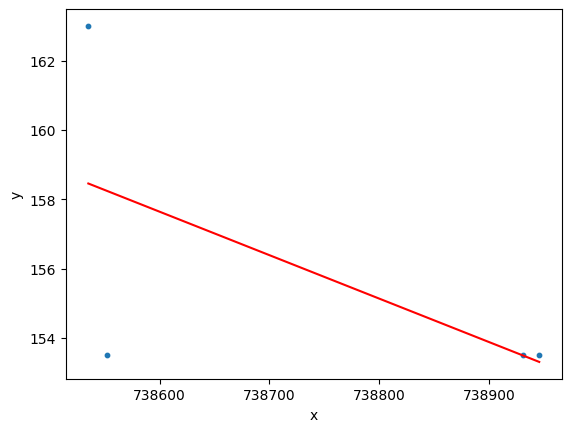

Régression pour Mean_Count_1:
  rmse : 1.0255290996230007
  r2 : 0.36204638623333807
  Coefficient (pente): -0.0038595535146095147
  Intercept: 2931.0143838255763



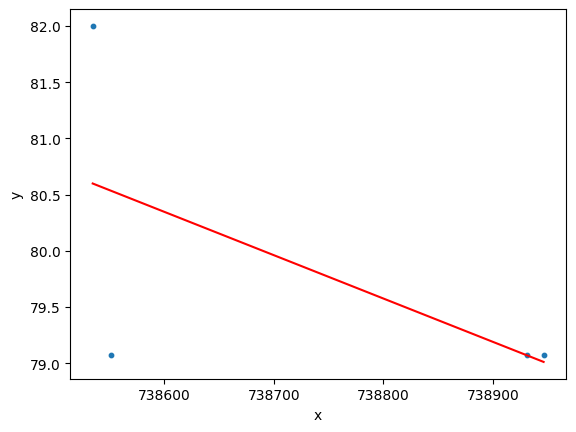

Régression pour Mean_Count_2:
  rmse : 0.6198585248536121
  r2 : 0.8775052572714034
  Coefficient (pente): 0.010660754521404069
  Intercept: -7839.42490691493



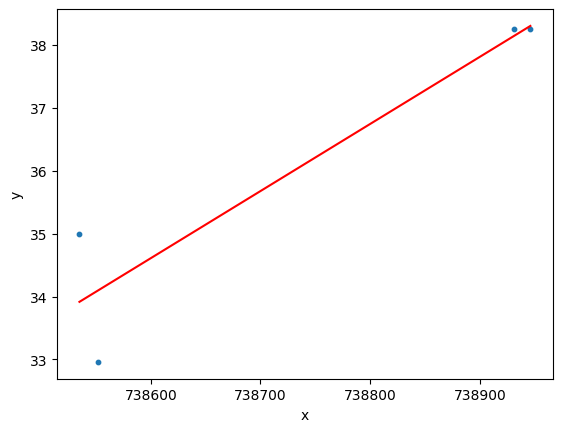

Régression pour Mean_Count_3:
  rmse : 648.2669663215681
  r2 : 0.3620463862335934
  Coefficient (pente): -0.09703759378393757
  Intercept: 71740.43585631746



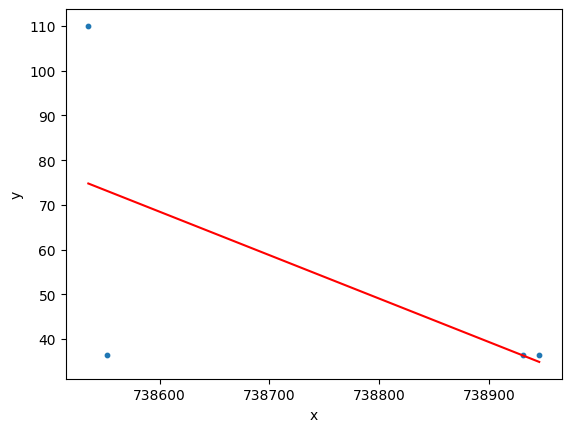

Régression pour Mean_Count_4:
  rmse : 0.02580261199111569
  r2 : 0.3620463862335479
  Coefficient (pente): 0.0006122022322564614
  Intercept: -432.9105536188554



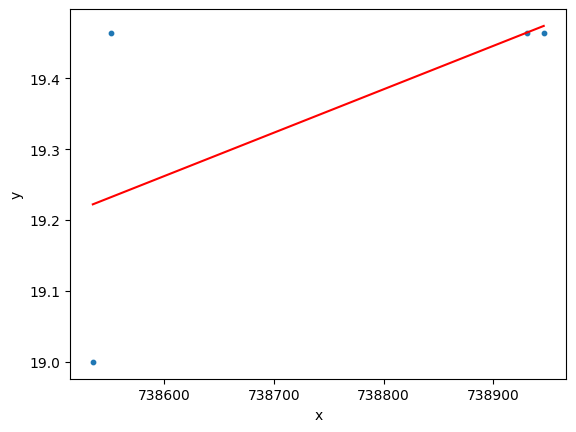

Régression pour Mean_Count_5:
  rmse : 0.19194451772780086
  r2 : 0.3620463862333356
  Coefficient (pente): -0.0016697479893728702
  Intercept: 1245.5612330752822



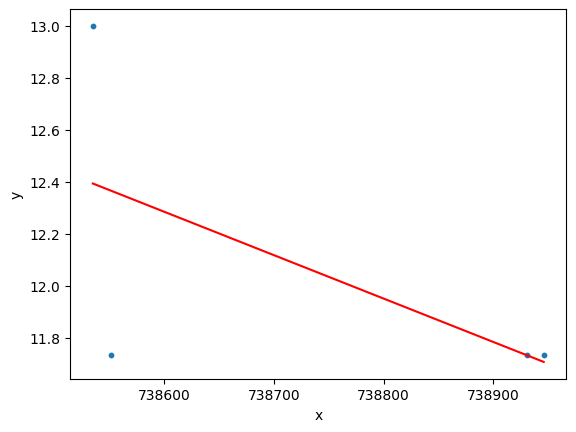

Régression pour Mean_Count_6:
  rmse : 0.06656065365622744
  r2 : 0.36204638623346785
  Coefficient (pente): 0.0009832679018073726
  Intercept: -691.8208455458147



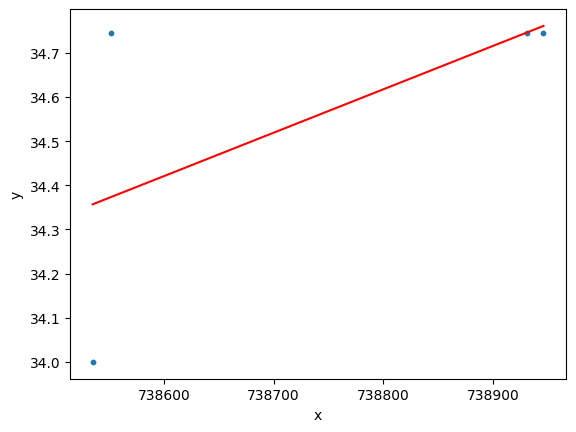

Régression pour Mean_Count_7:
  rmse : 0.0003918728014905266
  r2 : 0.3620463862333866
  Coefficient (pente): -7.544589829272392e-05
  Intercept: 56.69205055014216



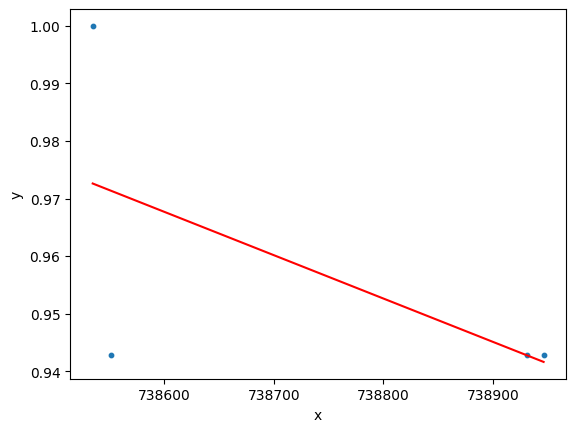

In [53]:
# Nous établissons la bibliothèque data comprenant chaque type d'emploi, les données du 15/01 sont celles scrappées, les suivantes sont établies aléatoirement pour tester la régression
data_count = {
    'Date': ['01/15/2023', '02/01/2023', '02/15/2024', '03/01/2024',],
    'Mean_Count_0': [count_salaries[0], count_salaries[0]*random_number0, count_salaries[0]*random_number0, count_salaries[0]*random_number0],  # Pour Number 1
    'Mean_Count_1': [count_salaries[1], count_salaries[1]*random_number1, count_salaries[1]*random_number1, count_salaries[1]*random_number1],  # Pour Number 2
    'Mean_Count_2': [count_salaries[2], count_salaries[2]*random_number0, count_salaries[2]*random_number2, count_salaries[2]*random_number2],  # Pour Number 2
    'Mean_Count_3': [count_salaries[3], count_salaries[2]*random_number3, count_salaries[2]*random_number3, count_salaries[2]*random_number3],  # Pour Number 2
    'Mean_Count_4': [count_salaries[4], count_salaries[4]*random_number4, count_salaries[4]*random_number4, count_salaries[4]*random_number4],  # Pour Number 2
    'Mean_Count_5': [count_salaries[5], count_salaries[5]*random_number5, count_salaries[5]*random_number5, count_salaries[5]*random_number5],  # Pour Number 2
    'Mean_Count_6': [count_salaries[6], count_salaries[6]*random_number6, count_salaries[6]*random_number6, count_salaries[6]*random_number6],  # Pour Number 2
    'Mean_Count_7': [count_salaries[7], count_salaries[7]*random_number7, count_salaries[7]*random_number7, count_salaries[7]*random_number7],  # Pour Number 2
    
}

# Création du data frame
df_count = pd.DataFrame(data_count)

# Transformation des dates en nombres et non en string
df_count['Date'] = pd.to_datetime(df['Date'])
df_count['Date_ordinal'] = df['Date'].apply(lambda x: x.toordinal())

# Nous faisons la regression linéaire pour chaque groupe de Number en excluant la colonne 'Date' et 'Date_ordinal'
for col in df_count.columns[1:-1]:  
    X_count = df_count[['Date_ordinal']]
    y_count = df_count[col]
    model_count = LinearRegression()
    model_count.fit(X_count, y_count)
    y_predicted = model_count.predict(X_count)

    # Évaluation du modèle
    rmse = mean_squared_error(y_count, y_predicted)
    r2 = r2_score(y_count, y_predicted)
   
    
    #  Nous affichons les résultats de la régression pour chaque groupe
    print(f"Régression pour {col}:")
    print(f"  rmse : {rmse}")
    print(f"  r2 : {r2}")
    print(f"  Coefficient (pente): {model_count.coef_[0]}")
    print(f"  Intercept: {model_count.intercept_}\n")

        # Points de données
    plt.scatter(X_count, y_count, s=10)
    plt.xlabel('x')
    plt.ylabel('y')
    # Valeurs prédites
    plt.plot(X_count, y_predicted, color='r')
    plt.show()
    

